In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential, Input
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('ParisHousingClass99.88.csv')
feature_columns = ["squareMeters", "numberOfRooms", "hasYard",
                   "hasPool", "floors", "cityCode", "cityPartRange",
                   "numPrevOwners", "made", "isNewBuilt", "hasStormProtector",
                   "basement", "attic", "garage", "hasStorageRoom", "price"]
df.head(5)

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price category  
0      4313   9005     956               0             7  7559081.5    Basic  
1      3653   2436     128               1             2  8085989.5   Luxury  
2      2937   8852     135               1             9  5574642.1    Basic  
3       659   7141     359               0             3  3232561.2   Luxury  
4      8435   2429     292               1             4  7055052.0   Luxury

In [3]:
# Change our label to binary
df['category'].replace("Basic", 0 , inplace = True)
df['category'].replace("Luxury", 1 , inplace = True)
# Make sure there is no significant imbalance between the labels
print(df['category'].value_counts()[0])
print(df['category'].value_counts()[1])
print(df['category'].value_counts()[0]/len(df))


df.head(1)

7470
2530
0.747


squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  category  
0      4313   9005     956               0             7  7559081.5         0

In [4]:
# Split into attributes & label
X = df[feature_columns]
y = df["category"]
# Split into training & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Making our Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.997


In [7]:
print(confusion_matrix(y_test, y_pred))

[[1489    5]
 [   1  505]]


In [8]:
# Plot our DT
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(DT,
                   feature_names=feature_columns,
                   filled=True)

In [9]:
# See how many Luxury apartments don't have a yard
len(df.where((df["hasYard"] == 0) & (df["category"] == 1)).dropna())

9

In [10]:
# See how many Luxury apartments aren't newly built
len(df.where((df["isNewBuilt"] == 0) & (df["category"] == 1)).dropna())

7

In [11]:
# Try removing hasYard & isNewBuilt
feature_columns = ["squareMeters", "numberOfRooms", "hasPool",
                   "floors", "cityCode", "cityPartRange",
                   "numPrevOwners", "made", "hasStormProtector",
                   "basement", "attic", "garage", "hasStorageRoom", "price"]

In [12]:
# Split into attributes & label
X = df[feature_columns]
y = df["category"]
# Split into training & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# Making our Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.602


In [15]:
print(confusion_matrix(y_test, y_pred))

[[1081  436]
 [ 360  123]]


In [16]:
# Plot our DT
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(DT,
                   feature_names=feature_columns,
                   filled=True)

## SVC

In [17]:
df = pd.read_csv('ParisHousingClass99.88.csv')
feature_columns = ["squareMeters", "numberOfRooms", "hasYard",
                   "hasPool", "floors", "cityCode", "cityPartRange",
                   "numPrevOwners", "made", "isNewBuilt", "hasStormProtector",
                   "basement", "attic", "garage", "hasStorageRoom", "price"]
normalize_columns = ["squareMeters", "numberOfRooms", "floors", "cityCode",
                     "cityPartRange", "numPrevOwners", "made", "basement",
                     "attic", "garage", "hasGuestRoom", "price"]
df.head(1)

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price category  
0      4313   9005     956               0             7  7559081.5    Basic

In [18]:
# Change our label to binary
df['category'].replace("Basic", 0 , inplace = True)
df['category'].replace("Luxury", 1 , inplace = True)
# Normalize columns that can be large sometimes
for column in normalize_columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

df.head(1)

squareMeters  numberOfRooms  hasYard  hasPool    floors  cityCode  \
0       0.75502       0.020202        0        1  0.626263  0.093747   

   cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0       0.222222       0.777778  0.483871           0                  1   

   basement    attic    garage  hasStorageRoom  hasGuestRoom     price  \
0    0.4313  0.90049  0.951111               0           0.7  0.755144   

   category  
0         0

In [19]:
# Split into attributes & label
X = df[feature_columns]
y = df["category"]
# Split into training & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Build our Support Vector Classifier with 3 different kernels
for i in ['linear', 'poly', 'rbf']:
    svc = SVC(kernel=i)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9985
[[1509    0]
 [   3  488]]
Accuracy: 0.9985
[[1509    0]
 [   3  488]]
Accuracy: 0.9985
[[1509    0]
 [   3  488]]


## ANN

In [21]:
df = pd.read_csv('ParisHousingClass99.88.csv')
feature_columns = ["squareMeters", "numberOfRooms", "hasYard",
                   "hasPool", "floors", "cityCode", "cityPartRange",
                   "numPrevOwners", "made", "isNewBuilt", "hasStormProtector",
                   "basement", "attic", "garage", "hasStorageRoom", "price"]
normalize_columns = ["squareMeters", "numberOfRooms", "floors", "cityCode",
                     "cityPartRange", "numPrevOwners", "made", "basement",
                     "attic", "garage", "hasGuestRoom", "price"]

# Change our label to binary
df['category'].replace("Basic", 0 , inplace = True)
df['category'].replace("Luxury", 1 , inplace = True)
# Normalize columns that can be large sometimes
for column in normalize_columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Split into attributes & label
X = df[feature_columns]
y = df["category"]
# Split into training & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# Built our ANN Model
# Input is the number of attributes we have
# Dense is the neuron-bearing layer
# Dropout removes some examples randomly per epoch to prevent overfitting
# Sigmoid Dense takes all of our weights and compiles it for a final label
# Instead of Dense(1, 'sigmoid'), we could also use a Dense(2, 'softmax') instead
model = Sequential([
    Input(shape=(16,)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [23]:
# Compile our Model
# Binary Cross Entropy compiles our loss, while our metrics measure accuracy
# Adam optimizer is a very common optimizer used for Neural Networks
# The optimizer is responsible for adjusting the weights for the dense layers' neurons
# Other optimizers include Stochastic Gradient Descent (SGD) and Root Mean Squared Propagation (RMSprop)
# However, I have decided to stay with the Adam optimizer, although all 3 work well
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fit the model over 200 epochs
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)

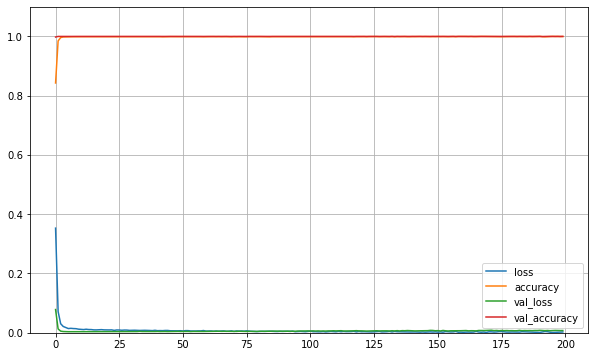

In [25]:
# Plot our ANN result
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.show()

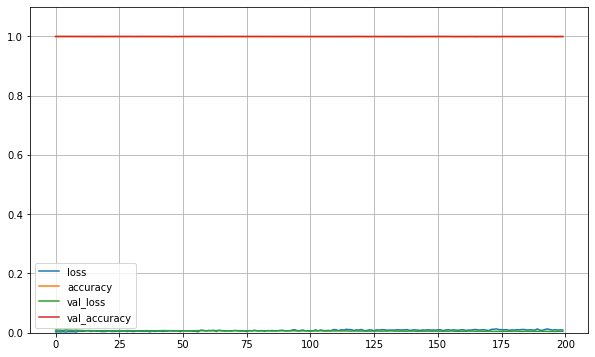

In [26]:
# Compile our Model
# Using RMSprop
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Fit the model over 200 epochs
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)
# Plot our ANN result
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.show()

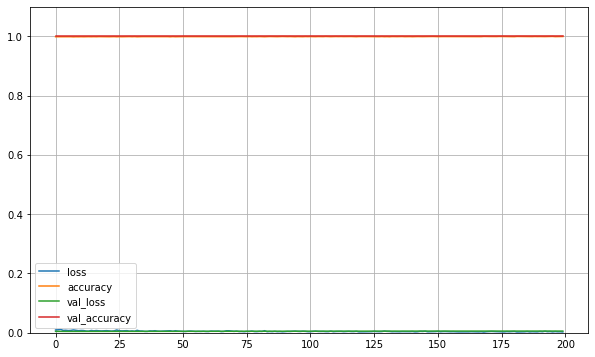

In [27]:
# Compile our Model
# Using SGD
model.compile(loss = 'binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Fit the model over 200 epochs
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)
# Plot our ANN result
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.show()

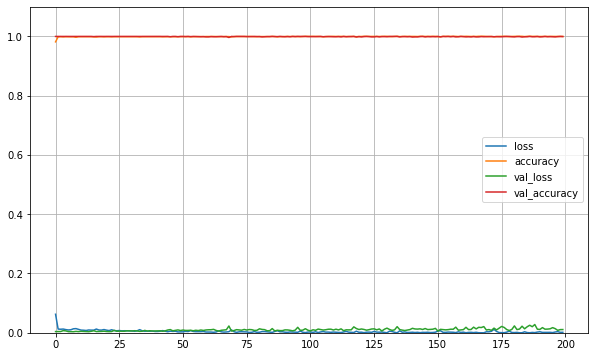

In [28]:
# Attempt with larger model & more layers
model = Sequential([
    Input(shape=(16,)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.show()